In [1]:
import mxnet as mx
import gluoncv as gcv
import matplotlib.pyplot as plt

In [8]:
image = mx.image.imread('C:/Users/Khantipu/source/repos/GluonCV/mt_baker.jpg')

In [9]:
print('type:', type(image))

type: <class 'mxnet.ndarray.ndarray.NDArray'>


In [10]:
print('shape:', image.shape)

shape: (1458, 3000, 3)


In [11]:
print('datatype:', image.dtype)

datatype: <class 'numpy.uint8'>


In [13]:
print('minimum value:', image.min().asscalar())
print('maximum value:', image.max().asscalar())

minimum value: 0
maximum value: 255


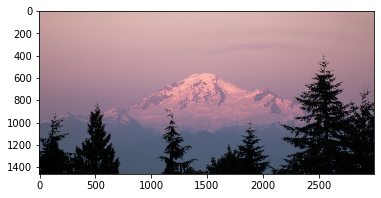

In [14]:
plt.imshow(image.asnumpy())

In [15]:
image = gcv.data.transforms.presets.imagenet.transform_eval(image)

In [16]:
print('type:', type(image))
print('shape:', image.shape)
print('datatype:', image.dtype)
print('minimum value:', image.min().asscalar())
print('maximum value:', image.max().asscalar())

type: <class 'mxnet.ndarray.ndarray.NDArray'>
shape: (1, 3, 224, 224)
datatype: <class 'numpy.float32'>
minimum value: -2.117904
maximum value: 2.2489083


In [20]:
network = gcv.model_zoo.get_model('ResNet50_v1d', pretrained = True)

55464KB [06:18, 146.42KB/s]                           


In [30]:
prediction = network(image)

In [31]:
print(prediction.shape)

(1, 1000)


In [33]:
prediction = prediction[0]
print(prediction.shape)

(1000,)


In [36]:
print('skipping 950 values...')
print(prediction[950:])

skipping 950 values...

[ 1.6024375   0.33270437  0.8699609   0.3202893   0.53283894 -0.29865944
  0.3442706   0.6321348   1.3812499   0.24068078  1.0242177   0.8519732
  0.1405384   0.05959806  0.23962063  0.23323384  0.577873    0.27351278
  0.70301884  0.31220543  6.5562572   1.3867819   1.8386289  -0.15775746
  1.69044     4.2608137   2.1198077   1.1774895   2.2558575   4.484904
  9.488943   -0.316594   -0.63358194 -0.5306212   0.88864875  0.74600995
  0.6333252   0.07998493  0.4988402   0.4806335   0.67252696  0.48652077
  0.46989343  1.0499997   1.253217    0.8966519  -0.46537554  0.6439089
  0.70805687  0.7872217 ]
<NDArray 50 @cpu(0)>


In [37]:
probability = mx.nd.softmax(prediction)

In [38]:
rounded_probability = mx.nd.round(probability*100)/100
print('skipping 950 values...')
print(rounded_probability[950:])

skipping 950 values...

[0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.04 0.   0.   0.   0.   0.   0.   0.
 0.   0.01 0.84 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.  ]
<NDArray 50 @cpu(0)>


In [39]:
k = 5
topk_indicies = mx.nd.topk(probability, k=k)
topk_indicies


[980. 970. 979. 672. 975.]
<NDArray 5 @cpu(0)>

In [40]:
for i in range(k):
    class_index = topk_indicies[i].astype('int').asscalar()
    class_label = network.classes[class_index]
    class_probability = probability[class_index]
    print('#{} {} ({:0.3}%)'.format(i+1, class_label, class_probability.asscalar()*100))

#1 volcano (84.1%)
#2 alp (4.48%)
#3 valley (0.564%)
#4 mountain tent (0.524%)
#5 lakeside (0.451%)
